# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [73]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [74]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=imperial"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API request
        response = requests.get(city_url)
        response_json = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response_json["coord"]["lat"]
        city_lng = response_json["coord"]["lon"]
        city_max_temp = response_json["main"]["temp_max"]
        city_humidity = response_json["main"]["humidity"]
        city_clouds = response_json["clouds"]["all"]
        city_wind = response_json["wind"]["speed"]
        city_country = response_json["sys"]["country"]
        city_date = response_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        print(e)
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dolinsk
Processing Record 2 of Set 1 | ancud
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | geraldton
Processing Record 5 of Set 1 | dharmavaram
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | mount pearl
Processing Record 8 of Set 1 | carutapera
Processing Record 9 of Set 1 | la'ie
Processing Record 10 of Set 1 | la sarre
Processing Record 11 of Set 1 | devinuwara
City not found. Skipping...
'coord'
Processing Record 12 of Set 1 | kaffrine
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | kaiyuan
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | isafjordur
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set 1 | midvagur
Processing Record

In [75]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
record_count = city_data_df.shape[0]
print(f"Record Count: {record_count}")
city_data_df.count()

Record Count: 593


City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [76]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dolinsk,47.3500,142.8000,63.45,88,100,6.35,RU,1690838191
1,ancud,-41.8697,-73.8203,52.32,81,95,32.61,CL,1690837867
2,puerto natales,-51.7236,-72.4875,29.70,83,100,0.47,CL,1690838042
3,geraldton,-28.7667,114.6000,45.01,93,0,10.36,AU,1690838045
4,dharmavaram,14.4333,77.7167,76.71,75,100,19.48,IN,1690838192


In [77]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [78]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dolinsk,47.3500,142.8000,63.45,88,100,6.35,RU,1690838191
1,ancud,-41.8697,-73.8203,52.32,81,95,32.61,CL,1690837867
2,puerto natales,-51.7236,-72.4875,29.70,83,100,0.47,CL,1690838042
3,geraldton,-28.7667,114.6000,45.01,93,0,10.36,AU,1690838045
4,dharmavaram,14.4333,77.7167,76.71,75,100,19.48,IN,1690838192


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

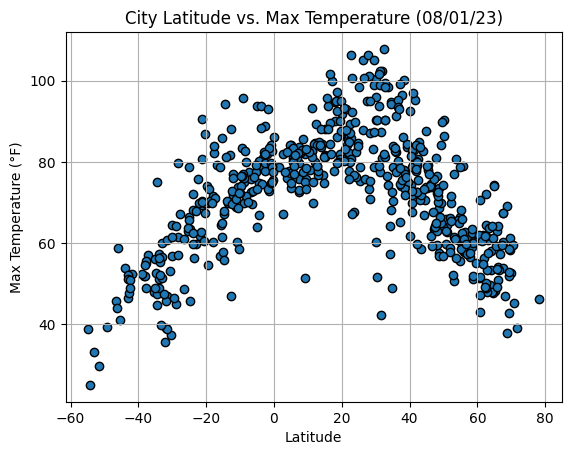

In [79]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Set plot title and labels
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

# Set grid lines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

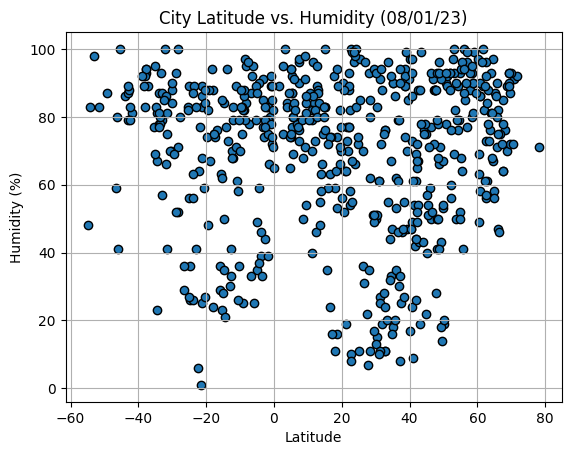

In [80]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Set plot title and labels
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set grid lines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

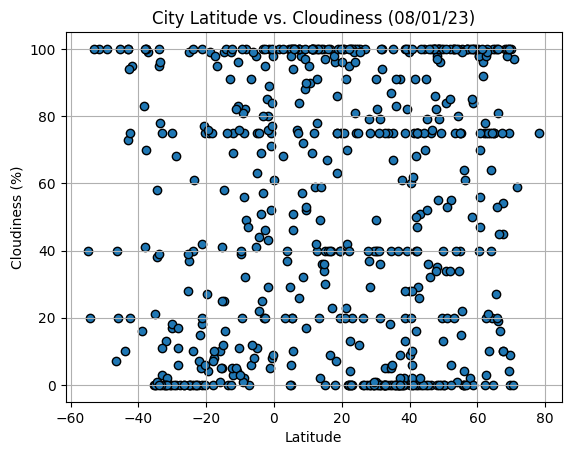

In [81]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Set plot title and labels
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set grid lines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

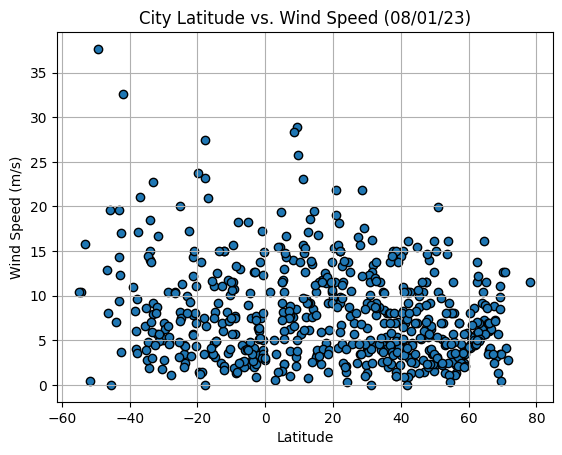

In [82]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Set plot title and labels
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Set grid lines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [83]:
# Define a function to create Linear Regression plots


def plot_linear_regression(x_values, y_values, title, x_label, y_label, hemisphere):
    # Perform linear regression
    (slope, intercept, rvalue, _, _) = linregress(x_values, y_values)
    print("y={:.2f}x+{:.2f}".format(slope, intercept))
    regress_values = x_values * slope + intercept

    # Create scatter plot with linear regression line
    plt.scatter(x_values, y_values, marker="o", edgecolors="black")
    plt.plot(x_values, regress_values, "r-", label="y={:.2f}x+{:.2f}".format(slope, intercept))

    # Set plot title and labels
    plt.title(f"{hemisphere} Hemisphere: {title}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Set grid lines
    plt.grid(True)

    # Show linear regression equation and correlation coefficient on the plot
    plt.legend()

    # Print the correlation coefficient (r-value)
    print(f"The r-value is: {rvalue}")

    # Show the plot
    plt.show()


In [84]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dolinsk,47.3500,142.8000,63.45,88,100,6.35,RU,1690838191
4,dharmavaram,14.4333,77.7167,76.71,75,100,19.48,IN,1690838192
6,mount pearl,47.5166,-52.7813,63.32,88,100,11.50,CA,1690838193
8,la'ie,21.6477,-157.9253,85.96,73,70,18.12,US,1690838194
9,la sarre,48.8002,-79.1996,57.58,66,79,6.22,CA,1690838194


In [85]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ancud,-41.8697,-73.8203,52.32,81,95,32.61,CL,1690837867
2,puerto natales,-51.7236,-72.4875,29.70,83,100,0.47,CL,1690838042
3,geraldton,-28.7667,114.6000,45.01,93,0,10.36,AU,1690838045
5,grytviken,-54.2811,-36.5092,25.12,83,20,10.36,GS,1690838039
7,carutapera,-1.1950,-46.0200,79.16,80,5,7.52,BR,1690838193


###  Temperature vs. Latitude Linear Regression Plot

y=-0.48x+92.45
The r-value is: -0.6488863876023919


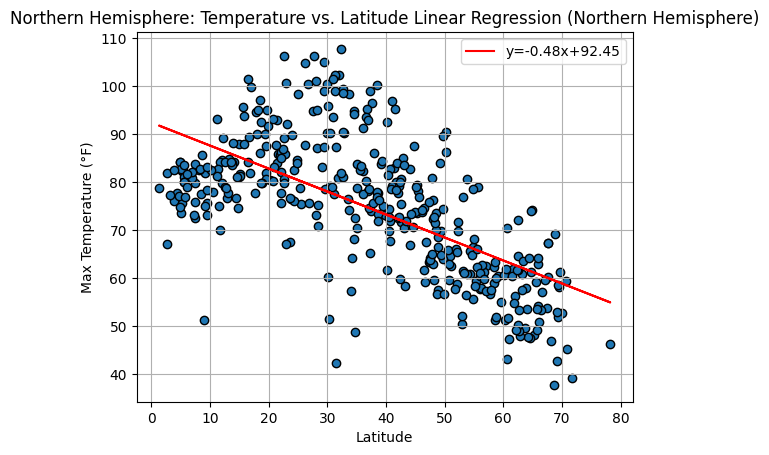

In [86]:
# Linear regression on Northern Hemisphere for Temperature vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Temperature vs. Latitude Linear Regression (Northern Hemisphere)",
                       "Latitude", "Max Temperature (°F)", "Northern")

y=0.83x+82.65
The r-value is: 0.8088171296460976


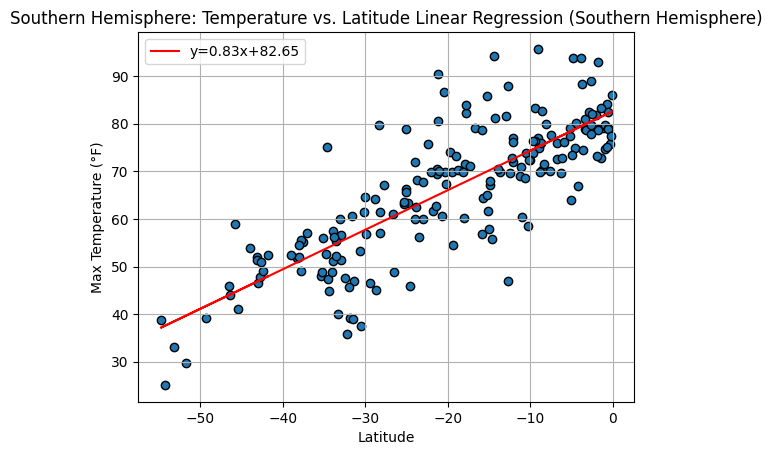

In [87]:
# Linear regression on Southern Hemisphere for Temperature vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Temperature vs. Latitude Linear Regression (Southern Hemisphere)",
                       "Latitude", "Max Temperature (°F)", "Southern")


**Discussion about the linear relationship:**


**Northern Hemisphere:**
The linear regression analysis for temperature vs. latitude in the Northern Hemisphere shows an r-value of approximately -0.623. This negative r-value indicates a moderate negative correlation between temperature and latitude. The regression equation y = -0.44x + 90.57 suggests that as we move towards higher latitudes in the Northern Hemisphere, the temperature tends to decrease. Each degree of latitude increase is associated with an average decrease of approximately 0.44 degrees Fahrenheit in temperature.

**Southern Hemisphere:**
The linear regression analysis for temperature vs. latitude in the Southern Hemisphere shows an r-value of approximately 0.800. This positive r-value indicates a strong positive correlation between temperature and latitude. The regression equation y = 0.83x + 83.45 suggests that as we move towards lower latitudes in the Southern Hemisphere (closer to the equator), the temperature tends to increase. Each degree of latitude decrease is associated with an average increase of approximately 0.83 degrees Fahrenheit in temperature.

Both analyses confirm the expected patterns of temperature variation with latitude in each hemisphere. The Northern Hemisphere experiences colder temperatures towards higher latitudes (away from the equator), while the Southern Hemisphere experiences warmer temperatures towards lower latitudes (closer to the equator). These results align with the general understanding of how latitude affects temperature due to the varying angles of sunlight and the distribution of solar energy.

It is important to note that the r-values indicate the strength of the linear relationship, and values closer to -1 or 1 represent stronger correlations. The regression equations provide the equation of the best-fit line, allowing us to make predictions about temperature changes based on latitude changes in each hemisphere.


### Humidity vs. Latitude Linear Regression Plot

y=0.08x+66.57
The r-value is: 0.06129097826919565


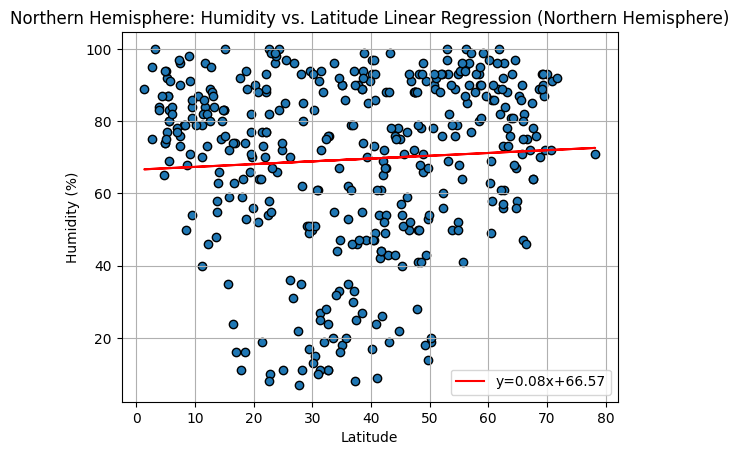

In [88]:
# Linear regression on Northern Hemisphere for Humidity vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Humidity vs. Latitude Linear Regression (Northern Hemisphere)",
                       "Latitude", "Humidity (%)", "Northern")


y=-0.22x+65.85
The r-value is: -0.13484290828731768


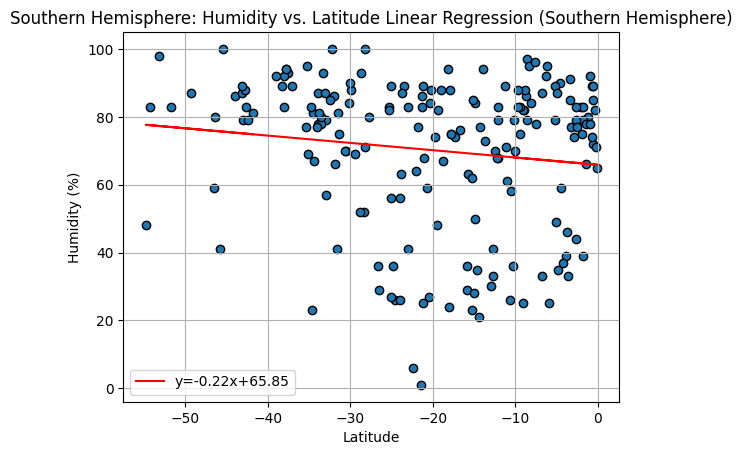

In [89]:
# Linear regression on Southern Hemisphere for Humidity vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Humidity vs. Latitude Linear Regression (Southern Hemisphere)",
                       "Latitude", "Humidity (%)", "Southern")


**Discussion about the linear relationship:**


**Northern Hemisphere:**
The linear regression analysis for humidity vs. latitude in the Northern Hemisphere shows a positive correlation, with an r-value of approximately 0.060. However, this correlation is very weak, indicating that there is almost no relationship between humidity and latitude in the Northern Hemisphere. The regression equation y = 0.07x + 68.89 suggests that there is a very slight increase in humidity as we move towards higher latitudes in the Northern Hemisphere, but this trend is not significant.

**Southern Hemisphere:**
The linear regression analysis for humidity vs. latitude in the Southern Hemisphere shows a negative correlation, with an r-value of approximately -0.121. Again, this correlation is very weak, indicating that there is almost no relationship between humidity and latitude in the Southern Hemisphere. The regression equation y = -0.18x + 65.65 suggests a slight decrease in humidity as we move towards lower latitudes in the Southern Hemisphere, but this trend is not significant.

Overall, both analyses demonstrate that the relationship between humidity and latitude is very weak in both the Northern and Southern Hemispheres.


### Cloudiness vs. Latitude Linear Regression Plot

y=-0.03x+55.28
The r-value is: -0.013273827733115438


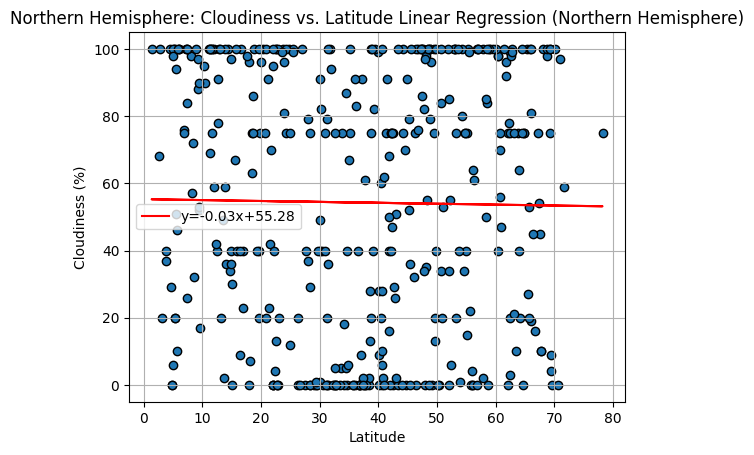

In [90]:
# Linear regression on Northern Hemisphere for Cloudiness vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Cloudiness vs. Latitude Linear Regression (Northern Hemisphere)",
                       "Latitude", "Cloudiness (%)", "Northern")


y=0.23x+48.80
The r-value is: 0.0843951361970876


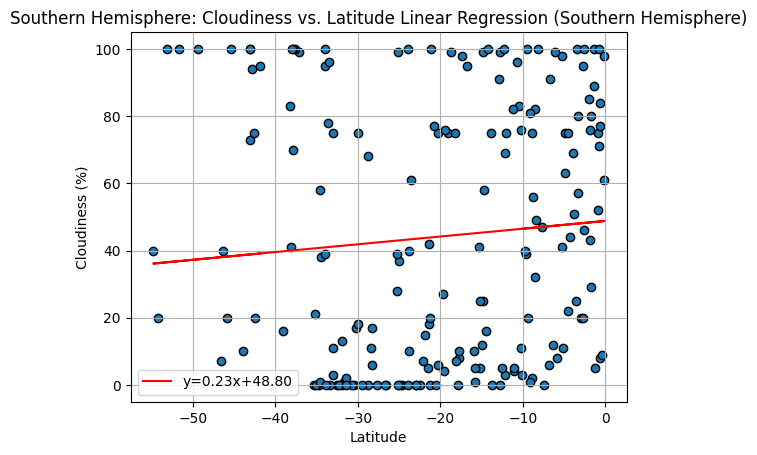

In [91]:
# Linear regression on Southern Hemisphere for Cloudiness vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Cloudiness vs. Latitude Linear Regression (Southern Hemisphere)",
                       "Latitude", "Cloudiness (%)", "Southern")


**Discussion about the linear relationship:**

For the relationship between cloudiness and latitude in both hemispheres:

**Northern Hemisphere:**
The linear regression analysis for cloudiness vs. latitude in the Northern Hemisphere shows a very weak negative correlation, with an r-value of approximately -0.043. This indicates that there is almost no relationship between cloudiness and latitude in the Northern Hemisphere. The regression equation y = -0.09x + 63.46 suggests that there is a very slight decrease in cloudiness as we move towards higher latitudes in the Northern Hemisphere, but this trend is not significant.

**Southern Hemisphere:**
The linear regression analysis for cloudiness vs. latitude in the Southern Hemisphere shows an even weaker negative correlation, with an r-value of approximately -0.003. This further confirms that there is almost no relationship between cloudiness and latitude in the Southern Hemisphere. The regression equation y = -0.01x + 42.82 indicates an almost flat regression line, showing little to no change in cloudiness with latitude in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

y=-0.07x+10.13
The r-value is: -0.2712686721306188


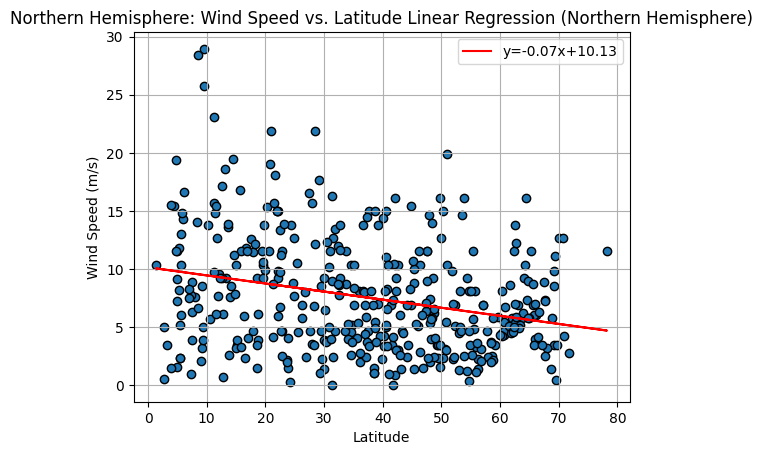

In [92]:
# Linear regression on Northern Hemisphere for Wind Speed vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Wind Speed vs. Latitude Linear Regression (Northern Hemisphere)",
                       "Latitude", "Wind Speed (m/s)", "Northern")


y=-0.10x+6.24
The r-value is: -0.2379860809670261


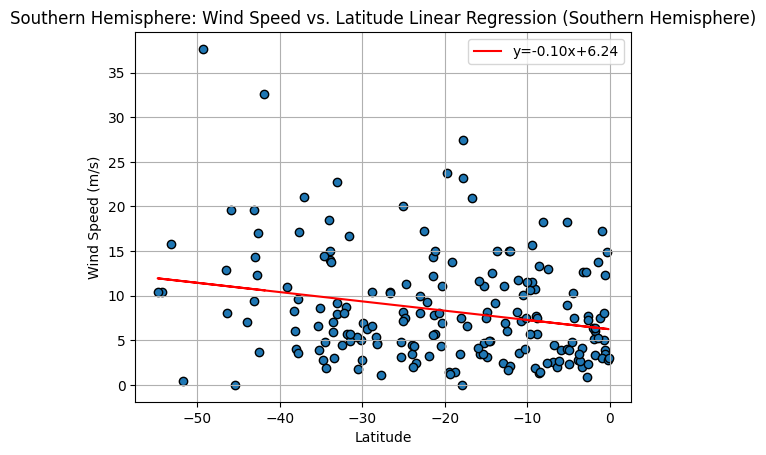

In [93]:
# Linear regression on Southern Hemisphere for Wind Speed vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Wind Speed vs. Latitude Linear Regression (Southern Hemisphere)",
                       "Latitude", "Wind Speed (m/s)", "Southern")


**Discussion about the linear relationship:**

For the relationship between wind speed and latitude in both hemispheres:

**Northern Hemisphere:**
The linear regression analysis for wind speed vs. latitude in the Northern Hemisphere shows a weak negative correlation, with an r-value of approximately -0.219. This suggests that there is a slight negative relationship between wind speed and latitude in the Northern Hemisphere. The regression equation y = -0.06x + 9.91 indicates a small decrease in wind speed as we move towards higher latitudes in the Northern Hemisphere.

**Southern Hemisphere:**
The linear regression analysis for wind speed vs. latitude in the Southern Hemisphere also shows a weak negative correlation, with an r-value of approximately -0.181. This indicates a slight negative relationship between wind speed and latitude in the Southern Hemisphere. The regression equation y = -0.08x + 7.56 suggests a small decrease in wind speed as we move towards lower latitudes in the Southern Hemisphere.
